In [3]:
import pandas as pd
import networkx as nx
from itertools import combinations
import matplotlib.pyplot as plt

Shai Gilgeous-Alexander: 0.0892140737210779
Stanley Umude: 0.056194790587706954
Bruce Brown: 0.05554757512424917
Domantas Sabonis: 0.05173690933561361
De'Aaron Fox: 0.04761113669042836
Damian Lillard: 0.04011637407292666
Tyrese Haliburton: 0.036455929425029246
Gradey Dick: 0.03439939528066567
Bobby Portis: 0.03246022151799016
Jontay Porter: 0.029234738298663805
Jimmy Butler: 0.024851297042391793
Chet Holmgren: 0.024255387518217184
Dalano Banton: 0.023285297793063698
Thomas Bryant: 0.023199158701285406
Brice Sensabaugh: 0.022082391320820117
Myles Turner: 0.020685345819956517
Jayson Tatum: 0.019157649861620767
James Harden: 0.018899321907656173
Jusuf Nurkic: 0.017201935805378304
Tyrese Maxey: 0.016729819332316563
Jordan Nwora: 0.01607751370713579
Keegan Murray: 0.015587522836320132
Caris LeVert: 0.014779752873374232
Trayce Jackson-Davis: 0.014722741257890777
Tobias Harris: 0.014604542134906487
Jalen Williams: 0.013849880283086445
Kelly Olynyk: 0.013497599965469164
Collin Sexton: 0.013266

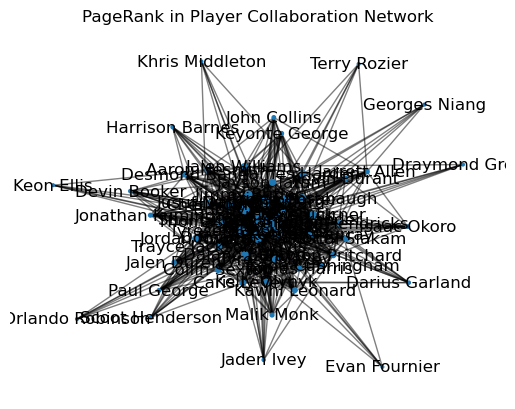

In [4]:

# Load your data
lineups_data = pd.read_csv('2_output.csv')


# Initialize an empty graph
G = nx.Graph()

# Assuming the player data starts from the second column to the eighth column in a 1-based index
player_columns = lineups_data.columns[1:8]  # Correctly selects columns for player data

# Iterate over each lineup in the dataframe
for index, lineup in lineups_data.iterrows():
    # Get all players in the lineup from the player columns and ensure they are not null
    players = [lineup[player] for player in player_columns if pd.notna(lineup[player])]
    
    # Add nodes and edges to the graph
    for player in players:
        if player not in G:
            G.add_node(player)
    
    # Add edges between all pairs of players in this lineup
    for player1, player2 in combinations(players, 2):
        if G.has_edge(player1, player2):
            G[player1][player2]['weight'] += 1
        else:
            G.add_edge(player1, player2, weight=1)

# Compute PageRank
page_rank = nx.pagerank(G, alpha=0.85)  # alpha is the damping parameter commonly set to 0.85

# Convert the PageRank dictionary to a sorted list for better visibility
sorted_page_rank = sorted(page_rank.items(), key=lambda item: item[1], reverse=True)

# Display the PageRank of each player
for player, rank in sorted_page_rank:
    print(f"{player}: {rank}")

# Optional: Visualize the PageRank values as node sizes in the graph
pos = nx.spring_layout(G)  # Node positions for all nodes
sizes = [1000 * page_rank[node] for node in G]  # Node sizes based on PageRank
nx.draw_networkx_nodes(G, pos, node_size=sizes)
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos)
plt.title('PageRank in Player Collaboration Network')
plt.axis('off')
plt.show()


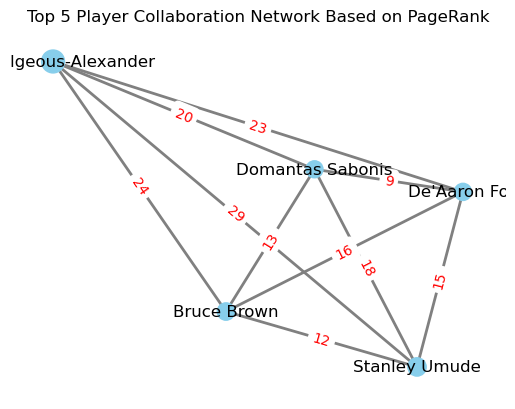

In [5]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load your data
lineups_data = pd.read_csv('output.csv')

# Initialize an empty graph
G = nx.Graph()

# Assuming the player data starts from the second column to the eighth column in a 1-based index
player_columns = lineups_data.columns[1:8]  # Correctly selects columns for player data

# Iterate over each lineup in the dataframe
for index, lineup in lineups_data.iterrows():
    # Get all players in the lineup from the player columns and ensure they are not null
    players = [lineup[player] for player in player_columns if pd.notna(lineup[player])]
    
    # Add nodes and edges to the graph
    for player in players:
        if player not in G:
            G.add_node(player)
    
    # Add edges between all pairs of players in this lineup
    for player1, player2 in combinations(players, 2):
        if G.has_edge(player1, player2):
            G[player1][player2]['weight'] += 1
        else:
            G.add_edge(player1, player2, weight=1)

# Compute PageRank
page_rank = nx.pagerank(G, alpha=0.85)  # alpha is the damping parameter commonly set to 0.85

# Sort players by PageRank and select the top 5
top_5_players = sorted(page_rank, key=page_rank.get, reverse=True)[:5]

# Create a subgraph containing only the top 5 players
subgraph = G.subgraph(top_5_players)

# Node positions using the Kamada-Kawai layout for better aesthetics
pos = nx.kamada_kawai_layout(subgraph)

# Draw nodes with sizes based on PageRank
node_sizes = [3000 * page_rank[node] for node in subgraph]
nx.draw_networkx_nodes(subgraph, pos, node_size=node_sizes, node_color='skyblue')

# Draw edges with labels for weights
nx.draw_networkx_edges(subgraph, pos, width=2, edge_color='gray')
edge_weights = nx.get_edge_attributes(subgraph, 'weight')
nx.draw_networkx_edge_labels(subgraph, pos, edge_labels=edge_weights, font_color='red')

# Draw labels for the nodes
nx.draw_networkx_labels(subgraph, pos, font_size=12, font_family="sans-serif")

# Set plot title and remove axis
plt.title('Top 5 Player Collaboration Network Based on PageRank')
plt.axis('off')
plt.show()
